In [1]:
import pandas as pd
import os
import numpy as np


In [2]:
os.chdir('C:\\RESEARCH\\LUAD\\Site')

In [3]:
genes=pd.read_excel('LUAD_Genes_Site.xlsx',index_col=0)

In [4]:
flux=pd.read_excel('LUAD_Flux_Site.xlsx',index_col=0)

In [5]:
clinical=pd.read_excel('LUAD_Clinical_Site.xlsx',index_col=0)

In [6]:
genes.head(2)

,UBE2Q2P2,SSX9,CXORF67,EFCAB8,SDR16C6P,EFCAB12,A1BG,A1CF,RBFOX1,GGACT,...,SLTM,SLU7,SLURP1,SMAD2,SMAD3,SMAD4,SMAD5,SMAD6,SMAD7,Primary Tumor Site
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,-0.4238,-0.1379,-0.1805,0.4529,-0.3317,-0.1012,-0.6977,-0.1476,-0.224,0.3832,...,-1.1877,3.4584,-0.2752,-0.7736,-0.6896,-0.0017,0.1779,-0.6433,0.7445,R-Lower
TCGA-05-4249-01,-0.3291,-0.1379,-0.1805,-0.0869,-0.3317,-0.1661,-0.1483,-0.1371,-0.226,-0.5346,...,-0.5540,0.7962,-0.2752,-0.6214,0.0881,1.3829,2.3203,-0.4918,0.0368,R-Lower


In [8]:
del genes['Primary Tumor Site']

In [9]:
g_f=genes.merge(flux,left_index=True,right_index=True)

In [10]:
g_c=g_f.merge(clinical,left_index=True,right_index=True)

In [12]:
g_c.shape


(517, 17109)

In [ ]:
dt=g_c

In [13]:
X=dt.iloc[:,0:17107].values
y=dt.iloc[:,-1].values

In [14]:
y

array(['R-Lower', 'R-Lower', 'R-Lower', 'L-Upper', 'R-Lower', 'R-Upper',
       'R-Upper', 'L-Upper', 'R-Lower', 'R-Middle', 'R-Upper', 'R-Lower',
       'R-Upper', 'R-Lower', 'L-Upper', 'L-Lower', 'R-Upper', 'L-Lower',
       'R-Lower', 'L-Lower', 'R-Upper', 'R-Middle', 'L-Lower', 'L-Upper',
       'L-Lower', 'R-Upper', 'L-Lower', 'R-Lower', 'L-Upper', 'L-Upper',
       'R-Upper', 'R-Upper', 'L-Upper', 'L-Upper', 'R-Upper', 'L-Upper',
       'R-Upper', 'L-Upper', 'R-Upper', 'L-Upper', 'R-Upper', 'R-Upper',
       'R-Upper', 'R-Upper', 'L-Upper', 'L-Upper', 'L-Upper', 'R-Upper',
       'R-Upper', 'R-Upper', 'R-Upper', 'L-Upper', 'R-Upper', 'L-Upper',
       'R-Upper', 'R-Upper', 'R-Upper', 'R-Upper', 'R-Upper', 'R-Lower',
       'L-Upper', 'R-Upper', 'R-Upper', 'R-Lower', 'R-Lower', 'L-Upper',
       'R-Upper', 'L-Lower', 'R-Upper', 'L-Lower', 'L-Lower', 'R-Upper',
       'R-Upper', 'L-Upper', 'R-Upper', 'R-Upper', 'L-Upper', 'R-Upper',
       'R-Lower', 'L-Upper', 'R-Lower', 'R-Upper'

In [15]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelEncoder_y = LabelEncoder()
y = labelEncoder_y.fit_transform(y.astype(str))


In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)
X_test = sc.transform(X_test)

In [18]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [19]:

# Predicting the Validation set results
y_val_pred = classifier.predict(X_val)

In [20]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_val_pred)
accuracy = ((cm[0][0]+cm[1][1]+cm[2][2]+cm[3][3]+cm[4][4]+cm[5][5]) / cm.sum())
accuracy

0.3373493975903614

Confusion Matrix, without normalization
[[ 0  2  0  1  0  5]
 [ 0  6  0  0  0 12]
 [ 0  0  0  0  0  1]
 [ 1  4  0  0  0 15]
 [ 0  1  0  0  0  4]
 [ 4  4  0  1  0 22]]


<Figure size 720x504 with 0 Axes>

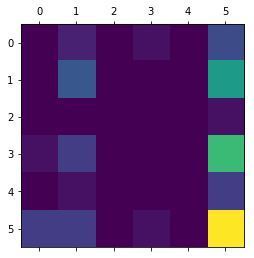

In [21]:
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)


Normalized confusion matrix
[[0.         0.25       0.         0.125      0.         0.625     ]
 [0.         0.33333333 0.         0.         0.         0.66666667]
 [0.         0.         0.         0.         0.         1.        ]
 [0.05       0.2        0.         0.         0.         0.75      ]
 [0.         0.2        0.         0.         0.         0.8       ]
 [0.12903226 0.12903226 0.         0.03225806 0.         0.70967742]]


<Figure size 432x288 with 0 Axes>

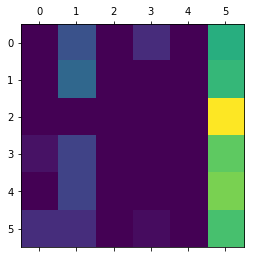

In [14]:
# Normalize the confusion matrix by row (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.matshow(cm_normalized)

In [15]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         8
          1       0.35      0.33      0.34        18
          2       0.00      0.00      0.00         1
          3       0.00      0.00      0.00        20
          4       0.00      0.00      0.00         5
          5       0.37      0.71      0.49        31

avg / total       0.22      0.34      0.26        83



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:

# Matthews Correlation Coefficient Calculation #
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_val, y_val_pred)

0.027419965017741264

In [17]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.28682049383780883

In [ ]:
"""
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C' : [1, 10, 100, 1000], 'kernel' : ['linear']},
              {'C' : [1, 10, 100, 1000], 'kernel' : ['rbf'], 'gamma' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters, 
                           scoring = 'accuracy',
                           cv = 10, 
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_"""

In [ ]:
################### Testing set ###########################

In [ ]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = ((cm[0][0]+cm[1][1]) / cm.sum())

In [ ]:
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)


In [ ]:
# Normalize the confusion matrix by row (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.matshow(cm_normalized)

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:

# Matthews Correlation Coefficient Calculation #
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)


In [ ]:

# ROC Curve Implementation
import scikitplot as skplt
y_pred = classifier.predict(X_test)
preds = y_pred[:,]
fpr, tpr, threshold = skplt.metrics.roc_curve(y_test, preds)
roc_auc = skplt.metrics.auc(fpr, tpr)

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
